In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random

In [2]:
df = pd.read_csv(r"C:\Users\hp\Music\2023\Datasets\homeprices_banglore.csv")
df.sample(5,random_state =4)


#The sample() method returns a specified number of random rows.

,area,bedrooms,price
19,800,1,32.0
3,1521,3,75.0
18,2770,3,102.0
6,2732,4,135.0
13,1100,2,40.0


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
# transform is called after fitting (5 cells down) so we need different fits sx and sy
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
# def partition (list_in, n):
#     random.shuffle(list_in)
#     return [list_in[i::n] for i in range(n)]
# l = partition(scaled_X,4)
# l

In [9]:
def partition (list_in, n):
    khali_list=[]
    for aa in range(0,len(list_in), n):
        khali_list.append(list_in[aa:aa+n])
    return khali_list
    


temp = [1,2,3,4,5,6,7,8,9]
temp2 = [10,20,30,40,50,60,70,80,90]
temp_o = partition(temp ,3)
temp_o
l = partition(scaled_X,4)
l

[array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ]]),
 array([[0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ]]),
 array([[0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ]]),
 array([[0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ]]),
 array([[0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]])]

In [7]:
m = partition(scaled_y,4)
m

[array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852]]),
 array([[0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111]]),
 array([[0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ]]),
 array([[0.04444444],
        [0.05925926],
        [0.51111111],
        [0.07407407]]),
 array([[0.11851852],
        [0.20740741],
        [0.51851852],
        [0.        ]])]

In [10]:
print(l[2])
print(m[2])

[[0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]]
[[0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]]


In [32]:
def partition (list_in, n):
    khali_list=[]
    for aa in range(0,len(list_in), n):
        khali_list.append(list_in[aa:aa+n])
    return khali_list

def mini_batch_gradient_descent(X, y_true, epochs,part, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features)) ; b = 0
    total_samples = X.shape[0] # shape [0] === rows /number of rows in X
    cost_list = [] ;epoch_list = []
    l = partition(X, part)
    m = partition(y_true,part)
    for i in range(epochs):  
        for j in range(0,5):
            sam_x = l[j]
            sam_y = m[j]
            y_predicted = np.dot(w, sam_x.T) + b
            w_grad = -(2/total_samples)*(sam_x.T.dot(sam_y-y_predicted))
            b_grad = -(2/total_samples)*np.sum(sam_y-y_predicted)
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            cost = np.mean(np.square(sam_y-y_predicted))
            if i%100==0: # at every 100th iteration record the cost and epoch value
                cost_list.append(cost)
                epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500,4)
w, b, cost

(array([0.7071003 , 0.67444238]), -0.23030023401193914, 0.01769098407369228)

In [28]:
w,b

(array([0.978837  , 0.97390795]), -0.04482273601793664)

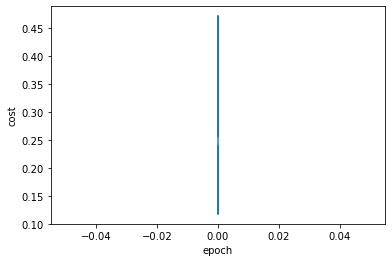

In [29]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [21]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.44688808145244

In [24]:
predict(1000,2,w, b) 

30.255246362268363

In [25]:
predict(1500,3,w, b)

69.47604576900446